In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper
import math
import time
start_time = time.time()


Welcome to JupyROOT 6.24/08


In [2]:
filename = "../output.root"
file = TFile(filename)
tree = file.Get("nominal")
print(tree.GetEntries())

258576


In [3]:
# hists
# 1. theta_t_truth
theta_t_Yt0  = TH1D ("theta_t_Yt0","theta_t_Yt0" ,40 ,-1 ,1)
theta_t_Yt1  = TH1D ("theta_t_Yt1","theta_t_Yt1" ,40 ,-1 ,1)
theta_t_Yt2  = TH1D ("theta_t_Yt2","theta_t_Yt2" ,40 ,-1 ,1)
theta_t_Yt3  = TH1D ("theta_t_Yt3","theta_t_Yt3" ,40 ,-1 ,1)
theta_t_Yt4  = TH1D ("theta_t_Yt4","theta_t_Yt4" ,40 ,-1 ,1)
theta_t_Yts = [theta_t_Yt0, theta_t_Yt1, theta_t_Yt2, theta_t_Yt3, theta_t_Yt4]



# 2. theta_bl_minimax
theta_bl_Yt0  = TH1D ("theta_bl_Yt0", "theta_bl_Yt0", 40,-1 ,1)
theta_bl_Yt1  = TH1D ("theta_bl_Yt1", "theta_bl_Yt1", 40,-1 ,1)
theta_bl_Yt2  = TH1D ("theta_bl_Yt2", "theta_bl_Yt2", 40,-1 ,1)
theta_bl_Yt3  = TH1D ("theta_bl_Yt3", "theta_bl_Yt3", 40,-1 ,1)
theta_bl_Yt4  = TH1D ("theta_bl_Yt4", "theta_bl_Yt4", 40,-1 ,1)
theta_bl_Yts = [theta_bl_Yt0, theta_bl_Yt1, theta_bl_Yt2, theta_bl_Yt3, theta_bl_Yt4]


In [4]:
for n in range(250000):
     
     tree.GetEntry(n)
     yt_weights = [getattr(tree, "t_yt_reweight0"), getattr(tree, "t_yt_reweight1"), getattr(tree, "t_yt_reweight2") , getattr(tree, "t_yt_reweight3"), getattr(tree, "t_yt_reweight4")]
     

     # rest frame theta top
     p4s_ttbar_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_ttbar_beforeFSR")
     p4s_t_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_t_beforeFSR")
     p4s_tbar_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_tbar_beforeFSR")

     BoostVector = p4s_ttbar_beforeFSR.BoostVector()

     p4s_t_beforeFSR_reboost = TLorentzVector(p4s_t_beforeFSR)
     p4s_t_beforeFSR_reboost.Boost(-BoostVector)

     p4s_tbar_beforeFSR_reboost = TLorentzVector(p4s_tbar_beforeFSR)
     p4s_tbar_beforeFSR_reboost.Boost(-BoostVector)

     # minimax

     # p4s_lep = helper.GetLorenzP4List(tree, 'lep')
     # p4s_bjet = helper.GetLorenzP4List(tree,'bjet')
     # ## minimax
     # if len(p4s_lep) !=2 or len(p4s_bjet) != 2: continue
     # idx_l, idx_b = helper.minimax_cross(p4s_lep, p4s_bjet)
     # bl_minimax = [p4s_lep[idx_l] + p4s_bjet[idx_b], p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]]
     if (True):
          for i in range(5):
               theta_t_Yts[i].Fill(p4s_t_beforeFSR.CosTheta(), yt_weights[i])
               theta_t_Yts[i].Fill(p4s_tbar_beforeFSR.CosTheta(), yt_weights[i])
               # theta_bl_Yts[i].Fill(bl_minimax[0].CosTheta(), yt_weights[i])
               # theta_bl_Yts[i].Fill(bl_minimax[1].CosTheta(), yt_weights[i])

     if (not(n % 50000)): 
        print("event:", n, "--- %.2f seconds ---" % (time.time() - start_time))


event: 0 --- 0.50 seconds ---


event: 50000 --- 16.60 seconds ---
event: 100000 --- 32.94 seconds ---
event: 150000 --- 50.21 seconds ---
event: 200000 --- 67.46 seconds ---


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


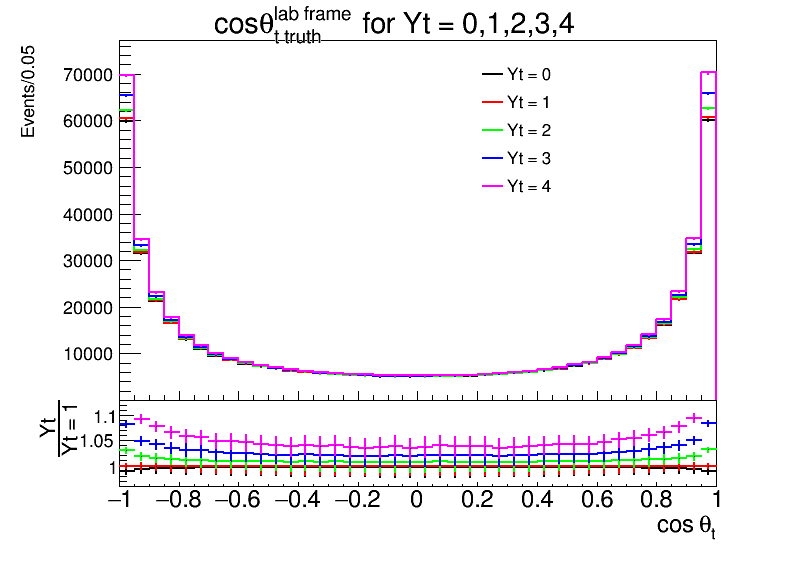

In [10]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.SetLeftMargin(0.15)

pad1.Draw()
pad1.cd()
gStyle.SetTitleFontSize(0.07)
theta_t_Yts[0].GetYaxis().SetLabelSize(0.05)
theta_t_Yts[0].SetTitle("cos#theta_{t truth}^{lab frame} for Yt = 0,1,2,3,4")
theta_t_Yts[0].GetYaxis().SetTitle("Events/0.05")
theta_t_Yts[0].GetYaxis().SetTitleSize(0.05)
theta_t_Yts[0].GetYaxis().SetRangeUser(1, theta_t_Yts[4].GetMaximum()*1.1)
theta_t_Yts[0].Draw()

leg = TLegend(0.6,0.5,0.75,0.85)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    theta_t_Yts[i].SetLineColor(color)
    theta_t_Yts[i].SetLineWidth(2)
    theta_t_Yts[i].Draw("same h")
    leg.AddEntry(theta_t_Yts[i],"Yt = "+ str(i), "l")
leg.SetBorderSize(0)
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.SetLeftMargin(0.15)

pad2.cd()

gStyle.SetOptStat(0)

ratios = []

for i in range(5):
    ratios.append(theta_t_Yts[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.18)
    # ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.18)
    ratio.GetYaxis().SetLabelSize(0.14)
    ratio.GetYaxis().SetTitleSize(0.16)
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    ratio.GetYaxis().SetTitle("#frac{Yt}{Yt = 1 }")
    ratio.GetXaxis().SetTitle("cos #theta_{t}")
    ratio.GetYaxis().SetRangeUser(0.96, 1.13)
    ratio.Divide(theta_t_Yts[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TPad::Range>: illegal world coordinates range: x1=-1.400000, y1=0.000000, x2=1.266667, y2=0.000000
Error in <TPad::RangeAxis>: illegal axis coordinates range: xmin=-1.000000, ymin=0.000000, xmax=1.000000, ymax=0.000000
Error in <TPad::Range>: illegal world coordinates range: x1=-1.400000, y1=0.000000, x2=1.266667, y2=0.000000
Error in <TPad::RangeAxis>: illegal axis coordinates range: xmin=-1.000000, ymin=0.000000, xmax=1.000000, ymax=0.000000


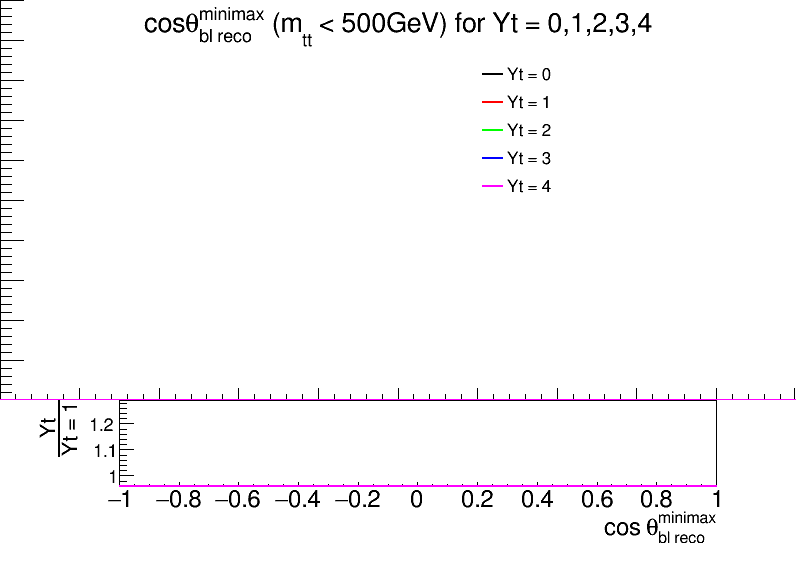

In [6]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.SetLeftMargin(0.15)

pad1.Draw()
pad1.cd()
gStyle.SetTitleFontSize(0.07)
theta_bl_Yts[0].GetYaxis().SetLabelSize(0.05)
theta_bl_Yts[0].SetTitle("cos#theta_{bl reco}^{minimax} (m_{tt} < 500GeV) for Yt = 0,1,2,3,4")
theta_bl_Yts[0].GetYaxis().SetTitle("Events/0.05")
theta_bl_Yts[0].Draw()
theta_bl_Yts[0].GetYaxis().SetTitleSize(0.05)

theta_bl_Yts[0].GetYaxis().SetRangeUser(0.01, theta_bl_Yts[4].GetMaximum()*1.1)
leg = TLegend(0.6,0.5,0.75,0.85)
colors = [1, 2, 3, 4, 6]
for i, color in enumerate(colors):
    theta_bl_Yts[i].SetLineColor(color)
    theta_bl_Yts[i].SetLineWidth(2)
    theta_bl_Yts[i].Draw("same h")
    leg.AddEntry(theta_bl_Yts[i],"Yt = "+ str(i), "l")
leg.SetBorderSize(0)
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.SetLeftMargin(0.15)

pad2.cd()

gStyle.SetOptStat(0)

ratios = []
for i in range(5):
    ratios.append(theta_bl_Yts[i].Clone("ratio"+str(i)))
for i, ratio in enumerate(ratios): 
    ratio.SetStats(False)
    ratio.SetTitle("")
    ratio.GetXaxis().SetLabelOffset(0.005)
    ratio.GetXaxis().SetLabelSize(0.18)
    # ratio.GetXaxis().SetTitleOffset(1.1)
    ratio.GetXaxis().SetTitleSize(0.18)
    ratio.GetYaxis().SetLabelSize(0.14)
    ratio.GetYaxis().SetTitleSize(0.16)
    ratio.GetYaxis().SetTitleOffset(0.3)
    ratio.GetYaxis().SetNdivisions(506)
    ratio.GetYaxis().SetTitle("#frac{Yt}{Yt = 1 }")
    ratio.GetXaxis().SetTitle("cos #theta_{bl reco}^{minimax}")
    ratio.GetYaxis().SetRangeUser(0.96, 1.29)
    ratio.Divide(theta_bl_Yts[1])
    ratio.Draw("same")

# ref = theta_bl_truth.Clone("ref")
# ref.Divide(theta_bl_truth)
# ref.Draw("same")
c.Draw()